# 🛒 **¡Llena ese carrito!**
---


## **Introducción**

**Instacart** es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


### 🗂️**Descripción de los datos**


Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

#### 📄 Estructura `instacart_orders.csv`: 
Cada fila corresponde a un pedido en la aplicación Instacart.

- `'order_id'`— número de ID que identifica de manera única cada pedido.
- `'user_id'`— número de ID que identifica de manera única la cuenta de cada cliente.
- `'order_number'`— el número de veces que este cliente ha hecho un pedido.
- `'order_dow'`— día de la semana en que se hizo el pedido (0 si es domingo).
- `'order_hour_of_day'`— hora del día en que se hizo el pedido.
- `'days_since_prior_order'`— número de días transcurridos desde que este cliente hizo su pedido anterior.

#### 📄 Estructura `products.csv`: 
Cada fila corresponde a un producto único que pueden comprar los clientes.

- `'product_id'`— número ID que identifica de manera única cada producto.
- `'product_name'`— nombre del producto.
- `'aisle_id'`— número ID que identifica de manera única cada categoría de pasillo de víveres.
- `'department_id'`— número ID que identifica de manera única cada departamento de víveres.

#### 📄 Estructura `order_products.csv`: 
Cada fila corresponde a un artículo pedido en un pedido.

- `'order_id'`— número de ID que identifica de manera única cada pedido.
- `'product_id'`— número ID que identifica de manera única cada producto.
- `'add_to_cart_order'`— el orden secuencial en el que se añadió cada artículo en el carrito.
- `'reordered'`— 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.

#### 📄 Estructura `aisles.csv`:

- `'aisle_id'`— número ID que identifica de manera única cada categoría de pasillo de víveres.
- `'aisle'`— nombre del pasillo.

#### 📄 Estructura `departments.csv`:

- `'department_id'`— número ID que identifica de manera única cada departamento de víveres.
- `'department'`— nombre del departamento.

## **Paso 1. 🔎 Descripción de los datos**
---


### **Plan de solución:**


>Para dar inicio al proyecto, en primer lugar prepararé los ingredientes con los que voy a trabajar, es decir, leeré y convertiré cada archivo en un DataFrame. Para esto, el primer paso es importar la librería Pandas, después haré uso de el método `pd.read_csv()`. Éste método, recibe como argumento la dirección del archivo csv que pandas debe leer, así como el parámetro `sep=` con el cual indicamos a nuestro método el carácter que debe buscar para separar los datos, que en este caso es `;`.
>
>Trabajaré de manera local en mi editor de texto VSCode por lo que establecí las variables `ubi_local` y `ubi_triple` para cambiar entre directorios de forma sencilla.
>
>Una vez creados los DataFrames, revisaré la información de cada uno utilizando el método `info()` y también `head()` para ver las primeras 5 filas de cada DataFrame y familizarme con mi conjunto de datos.

In [1]:
# importar librerías
import pandas as pd

In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('instacart_orders.csv', sep=';')
products = pd.read_csv('products.csv', sep=';')
aisles = pd.read_csv('aisles.csv', sep=';')
departments = pd.read_csv('departments.csv', sep=';')
order_products = pd.read_csv('order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame
orders.info()
print('*********************************************************')
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
*********************************************************


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
# mostrar información del DataFrame
products.info()
print('*********************************************************')
display(products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
*********************************************************


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# mostrar información del DataFrame
aisles.info()
print('*********************************************************')
display(aisles.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
*********************************************************


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
# mostrar información del DataFrame
departments.info()
print('*********************************************************')
display(departments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
*********************************************************


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
# mostrar información del DataFrame
order_products.info(show_counts=True)
print('*********************************************************')
display(order_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
*********************************************************


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


### **Conclusiones:**


>Después de observar cada uno de los DataFrames puedo concluir que algunos de éstos requieren procesamiento antes de trabajar con ellos, ya que algunos presentan detalles que podrían afectar el análisis. A continuación describo lo que he podido identificar:
>
>🧾
 `instacart_orders`:
>
>- La columna `'days_since_prior_order'` contiene datos nulos y requiere un cambio de tipo de datos de float a int.
>
>🧾
 `products`:
>
>- La columna `'product_name'` tiene datos ausentes.
>
>🧾
 `order_products`:
>
>- La columna `'add_to_cart_order'` tiene datos nulos y requiere un cambio de tipo de datos de float a int.
>
>En el caso de las columnas `aisles` y `departments` no se han identificado errores hasta ahora, pero no se debe descartar la posibilidad de que existan datos duplciados.


## **Paso 2. 🛠️ Preprocesamiento de los datos**
---


Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

### **Plan de solución:**


> Para el paso 2 será necesario examinar uno por uno cada DataFrame, en búsqueda de optimizarlos lo mas posible para que estén listos para el análisis.
>
> Durante este proceso, se examina la presencia de datos duplicados, tanto explicitos con `duplicated()` como implícitos. Seguido de esto, se deben identificar en qué columnas existen datos ausentes con `isna()`, analizar si es posible sustituirlos por algun dato en particular o definitivamente eliminarlos. Por último, se deben corregir los tipos de datos en caso de ser necesario con métodos como `astype()`. 

### **Encuentra y elimina los valores duplicados.**
---

#### 🧾 **Dataframe** `orders`

In [8]:
# Revisa si hay pedidos duplicados
num_orders_duplicated = orders.duplicated().sum()

print('Número de pedidos duplicados:', num_orders_duplicated)
print('********************************')
filtro_duplicados = orders.duplicated() #Mascara booleana
print('Lista de pedidos duplicados:')
display(orders[filtro_duplicados])

Número de pedidos duplicados: 15
********************************
Lista de pedidos duplicados:


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


**¿Tienes líneas duplicadas?, ¿qué tienen en común?**
>
>**Respuesta:** El DataFrame filtrado muestra que todos las filas repetidas tienen en común que se realizaron el día Miércoles a las 02:00 hrs

In [9]:
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print('Pedidos realizados el Miércoles a las 2:00 a.m:')
print('***********************************************')
display(orders.query('order_dow == 3 & order_hour_of_day == 2'))

Pedidos realizados el Miércoles a las 2:00 a.m:
***********************************************


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


**¿Qué sugiere este resultado?**

>**Respuesta:** Tenemos registro de 121 ordenes realizadas el Miércoles a las 02:00 hrs, de los cuales hemos identificado que 15 son duplicados, lo que nos deja un total de 106 ordenes reales. Si bien ocurrió algo que afectó el registro de las ordenes en este horario, no afectó en su totalidad.

In [10]:
# Elimina los pedidos duplicados
orders = orders.drop_duplicates()

In [11]:
# Vuelve a verificar si hay filas duplicadas
num_orders_duplicated = orders.duplicated().sum()

print('Número de pedidos duplicados:', num_orders_duplicated)

Número de pedidos duplicados: 0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print('Número de order_id duplicados:', orders['order_id'].duplicated().sum())

Número de order_id duplicados: 0


**Describe brevemente tus hallazgos y lo que hiciste con ellos:**

>A través del método `duplicated()` fue posible no solo contar el número de datos duplicados, si no también filtrar el DataFrame y encontrar la relación que existía entre ellos, que en este caso fue que todos fueron registrados en Miércoles a las 02:00 hrs.
>
>Además, con el método `drop_duplicates()` eliminamos estos registros repetidos, de esta forma evitamos que estos datos duplicados afecten nuestro futuro análisis.

#### 🧾 **Dataframe** `products`

In [13]:
# Verifica si hay filas totalmente duplicadas
num_products_duplicated = products.duplicated().sum()

print('Número de filas duplicadas:', num_products_duplicated)

Número de filas duplicadas: 0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
print('Número de department_id duplicados:', products['department_id'].duplicated().sum())
print('*****************************************')
display(products['department_id'].value_counts().reset_index(drop=False))

Número de department_id duplicados: 49673
*****************************************


,department_id,count
0,11,6564
1,19,6264
2,13,5372
3,7,4366
4,1,4008
5,16,3449
6,17,3085
7,15,2092
8,9,1858
9,4,1684


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper() # Convirtiendo los nombres a mayúsculas

print('Número de product_name duplicados:', products['product_name'].duplicated().sum()) # Contando duplicados
print('***************************************')
display(products['product_name'].value_counts(dropna=False).reset_index())

Número de product_name duplicados: 1361
***************************************


,product_name,count
0,NaN,1258
1,GREEN TEA WITH GINSENG AND HONEY,3
2,HEARTS OF PALM,2
3,DICED PEELED TOMATOES IN TOMATO JUICE,2
4,FLAT FILLETS OF ANCHOVIES IN PURE OLIVE OIL,2
...,...,...
48328,VODKA- TRIPLE DISTILLED- TWIST OF VANILLA,1
48329,EN CROUTE ROAST HAZELNUT CRANBERRY,1
48330,ARTISAN BAGUETTE,1
48331,SMARTBLEND HEALTHY METABOLISM DRY CAT FOOD,1


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
print('Número de product_name duplicados no faltantes:', products.dropna()['product_name'].duplicated().sum())

Número de product_name duplicados no faltantes: 104


**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

>**Respuesta:** 
>
>Para el DataFrame `products` no existen filas completamente duplicadas, pero si existen valores duplicados para las columnas de `department_id` y `product_name`. 
>
>El caso de `department_id` no representa un problema a simple vista ya que es una categoría que puede repetirse de acuerdo al producto al que está asociado. 
>
>Por otro lado en la columna `product_name` no deberían existir duplicados ya que cada fila representa un producto único disponible para compra. Llama la atención que en primera instancia el método `duplicated()` identifica 1361 nombres de productos duplicados, pero con ayuda de el método `value_counts()` podemos ver que 1258 son valores ausentes. Esto nos deja con 104 duplicados que NO son valores ausentes.

#### 🧾 **Dataframe** `departments`

In [17]:
# Revisa si hay filas totalmente duplicadas
print('Número de filas duplicadas:', departments.duplicated().sum())

Número de filas duplicadas: 0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print('Número de department_id duplicados:', departments['department_id'].duplicated().sum())

Número de department_id duplicados: 0


**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

>**Respuesta:** Aquí todo está en orden, no existen duplicados en ninguna columna.

#### 🧾 **Dataframe** `aisles`

In [19]:
# Revisa si hay filas totalmente duplicadas
print('Número de filas duplicadas:', aisles.duplicated().sum())

Número de filas duplicadas: 0


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print('Número de aisle_id duplicados:', aisles['aisle_id'].duplicated().sum())

Número de aisle_id duplicados: 0


**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

>**Respuesta:** Aquí todo está en orden, no existen duplicados en ninguna columna.

#### 🧾 **Dataframe** `order_products`

In [21]:
# Revisa si hay filas totalmente duplicadas
print('Número de filas duplicadas:', order_products.duplicated().sum())

Número de filas duplicadas: 0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print('Número de order_id duplicados:', order_products['order_id'].duplicated().sum())
print('Número de product_id duplicados:', order_products['product_id'].duplicated().sum())
print('Número de add_to_cart_order duplicados:', order_products['add_to_cart_order'].duplicated().sum())
print('Número de reordered duplicados:', order_products['reordered'].duplicated().sum())


Número de order_id duplicados: 4094961
Número de product_id duplicados: 4499434
Número de add_to_cart_order duplicados: 4544942
Número de reordered duplicados: 4545005


**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

>**Respuesta:**
>
>Aquí todo está en orden, no existen filas totalmente duplicadas. Todas las columnas por individual tienen datos duplicados, pero esto no representa un problema en este contexto debido a que un pedido puede incluir diferentes productos, por lo que se repetiría y un producto puede aparecer en diferentes pedidos.

### **Encuentra y elimina los valores ausentes**
---

Al trabajar con valores duplicados, pudimos observar la importancia de investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

#### 🧾 **Dataframe** `products`

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print('Número de valores ausentes en la columna product_name:', products['product_name'].isna().sum())
print("***********************************************************")
filtro_pn_ausentes = products['product_name'].isna()
print('Filas con valores ausentes en la columna product_name:')
display(products[filtro_pn_ausentes])

Número de valores ausentes en la columna product_name: 1258
***********************************************************
Filas con valores ausentes en la columna product_name:


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21



>Existen 1258 valores ausentes en la columna `product_name`. Filtrando el DataFrame con las filas en donde aparecen estos datos ausentes, parece ser que existe una relación entre estos datos ausentes con el pasillo 100 y el departamento 21.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
filtro_pn_ausentes = products['product_name'].isna()
print('Número de valores ausentes en la columna product_name:', len(products[filtro_pn_ausentes]))
print('Número de valores ausentes en la columna product_name donde aisle_id es 100:', len(products[filtro_pn_ausentes].query('aisle_id == 100')))

Número de valores ausentes en la columna product_name: 1258
Número de valores ausentes en la columna product_name donde aisle_id es 100: 1258



>Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print('Número de valores ausentes en la columna product_name:', len(products[filtro_pn_ausentes]))
print('Número de valores ausentes en la columna product_name donde department_id es 100:', len(products[filtro_pn_ausentes].query('department_id == 21')))

Número de valores ausentes en la columna product_name: 1258
Número de valores ausentes en la columna product_name donde department_id es 100: 1258



> Todos los nombres de productos ausentes están relacionados con el departamento con ID 21.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
display(departments.query('department_id == 21'))
print('**************************************')
display(aisles.query('aisle_id == 100'))

,department_id,department
20,21,missing


**************************************


,aisle_id,aisle
99,100,missing



>Tanto el pasillo con ID 100 como el departamento con ID 21 tienen el nombre "missing".

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products = products.fillna('Unknown')
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

>Ahora a todos los productos relacionados con el pasillo con ID 100 y el departamento con ID 21 se les asignó el nombre "Unknown" y ya no cuenta con datos ausentes.

#### 🧾 **Dataframe** `orders`:

In [28]:
# Encuentra los valores ausentes
print(orders.isna().sum())
print('********************************************')
# DataFrane filtrado a para mostrar unicamente donde los registros con valores ausentes en la columna 'days_since_prior_order'
display(orders[orders['days_since_prior_order'].isna()])

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64
********************************************


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
display(orders[orders['days_since_prior_order'].isna()]['order_number'].value_counts().reset_index())

,order_number,count
0,1,28817


In [30]:
# Sustituir valores ausentes con 0
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0)
# Cambiar el tipo de dato a int
orders['days_since_prior_order'] = orders['days_since_prior_order'].astype('int')

**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

>Todos los valores ausentes en la columna `days_since_prior_order` se relacionan con el valor "1" en `order_number`, ya que corresponden al primer pedido del cliente. En estos casos, no es posible calcular los días transcurridos desde un pedido anterior, dado que no existe uno previo.
>
> Por esta razón, los valores ausentes NaN fueron sustituidos por 0. Los valores en `days_since_prior_order` fueron convertidos de tipo `float64` a `int64`.

#### 🧾 **Dataframe** `order_products` 

In [31]:
# Encuentra los valores ausentes
print(order_products.isna().sum())
print('***********************************')
# DataFrane filtrado a para mostrar unicamente donde los registros con valores ausentes en la columna 'add_to_cart_order'
display(order_products[order_products['add_to_cart_order'].isna()]) 

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
***********************************


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('Valor máximo en "add_to_cart_order":', order_products['add_to_cart_order'].max())
print('Valor mínimo en "add_to_cart_order":', order_products['add_to_cart_order'].min())


Valor máximo en "add_to_cart_order": 64.0
Valor mínimo en "add_to_cart_order": 1.0


>La orden mas grande contiene 64 productos.

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
add_to_cart_order_NaN = order_products[order_products['add_to_cart_order'].isna()]
add_to_cart_order_NaN = add_to_cart_order_NaN['order_id'].unique()
print("Número de ordenes id con almenos un valor ausente en la columna 'add_to_cart_order':", len(add_to_cart_order_NaN))
display(add_to_cart_order_NaN)

Número de ordenes id con almenos un valor ausente en la columna 'add_to_cart_order': 70


array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
    # Agrupa todos los pedidos con datos ausentes por su ID de pedido.
    # Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
x = (
    order_products[order_products['order_id'].isin(add_to_cart_order_NaN)]
    .groupby('order_id', as_index=False)
    .agg(product_count=('product_id','count'))
)
print('********************************************')
print('Valor mínimo del conteo:', x['product_count'].min())

********************************************
Valor mínimo del conteo: 65


>Los valores ausentes en la columna `add_to_cart_order` del DataFrame `order_products` tienen relación con el número de productos en la orden, en todos los pedidos con valor ausente en la columna `add_to_cart_order` la cantidad de productos es mayor a 64.

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart' con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')
order_products.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

>Los valores ausentes en la columna `add_to_cart_order` pueden atribuirse a un error en el sistema el cual es capaz únicamente de enumerar los artículos del 1 al 64, a partir de esta cantidad, el sístema deja de registrar. La mejor opción es sustituirlos por un valor facil de identificar y que no afecte el futuro análisis, en este caso 999. Originalmente la columna almacenaba valores float, pero lo mas adecuado fue transformarlos en tipo int ya que ninguno tenía valores despues del punto decimal.

### **Conclusiones:**



>La etapa de preprocesameinto de datos es fundamental para tener la certeza de que trabajamos con conjuntos de datos con buena calidad y asegurar un análisis de alta calidad también.
>
>Se identificaron algunos registros duplicados al igual que datos ausentes en distintas columnas. Mediante un análisis mas detallado fue posible identificar tendencias y relaciones entre los datos ausentes y sus posibles causas. Se optó por sustituir estos valores ausentes por categorías o valores a manera que no afecten nuestro futuro análisis.
>
>**Ocurre algo curioso,** para el DataFrame `products` aun existen 104 datos duplicados en la columna `product_name`, lo cual es incorrecto porque cada nombre de producto debería se único, pero no sucede lo mismo en la columna `product_id` lo que sugiere que se registraron nombres duplicados (probablemente con diferencias en mayúsculas y minúsculas) a los que se les fue asignado un id diferente. Esto significa que tenemos productos asignados a 2 o mas IDs.


## **Paso 3. 🧠 Análisis de los datos**
---

### **Etapa [A]**
---

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).

2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.

3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.

4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

#### **[A1] Verifica que los valores sean sensibles**


In [36]:
# Encontrando valores mínimo y máximo en la columna 'order_hour_of_day'
print('Valor mínimo en "order_hour_of_day":', orders['order_hour_of_day'].min())
print('Valor máximo en "order_hour_of_day":', orders['order_hour_of_day'].max())

Valor mínimo en "order_hour_of_day": 0
Valor máximo en "order_hour_of_day": 23


In [37]:
# Encontrando valores mínimo y máximo en la columna 'order_dow'
print('Valor mínimo en "order_dow":', orders['order_dow'].min())
print('Valor máximo en "order_dow":', orders['order_dow'].max())

Valor mínimo en "order_dow": 0
Valor máximo en "order_dow": 6


>**Conclusiones:**
>
> Los valores en `'order_hour_of_day'` y `'order_dow'` son razonables ya que todos sus valores se encuentran en los rangos adecuados.> 

#### **[A2] Para cada hora del día, ¿cuántas personas hacen órdenes?**

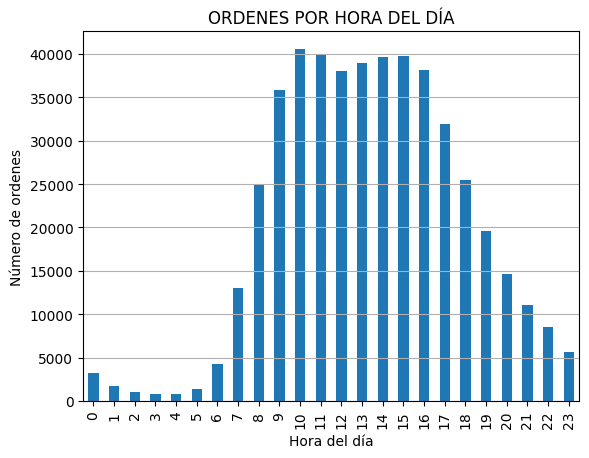

In [38]:
# Librería para gráficos
from matplotlib import pyplot as plt

# Calculando número de personas que hacen órdenes por hora del día
orders_per_hour = orders.groupby(by='order_hour_of_day')['user_id'].count()

# Creando gráfico
orders_per_hour.plot(
    kind='bar',
    title='ORDENES POR HORA DEL DÍA',
    xlabel='Hora del día',
    ylabel='Número de ordenes'
)

plt.grid(axis='y')
plt.show()


> **Conclusiones:**
>
> Las ventas aumentan entre las 9 y las 17 hrs, el horario con mas ventas es a las 10 hrs. 

#### **[A3] ¿Qué día de la semana compran víveres las personas?**

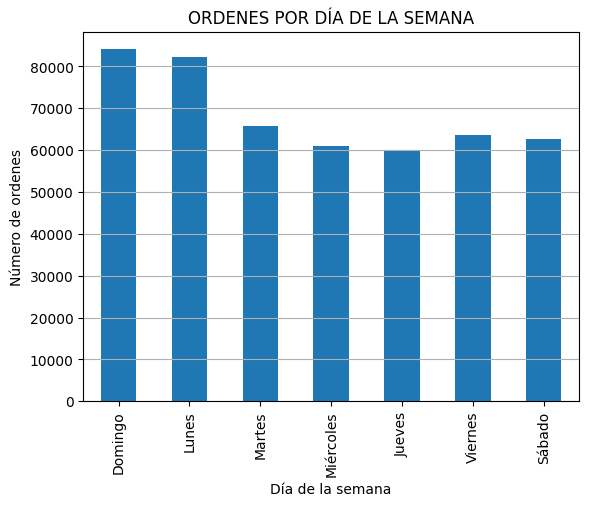

In [39]:
# Calculando el número de ordenes por día de la semana
orders_per_day = orders.groupby(by='order_dow')['user_id'].count()

# Creando gráfico
ax = orders_per_day.plot(kind='bar', title='ORDENES POR DÍA DE LA SEMANA', xlabel='Día de la semana', ylabel='Número de ordenes')

# Cambiar etiquetas del eje X usando diccionario
dias_semana = {
    0: 'Domingo',
    1: 'Lunes',
    2: 'Martes',
    3: 'Miércoles',
    4: 'Jueves',
    5: 'Viernes',
    6: 'Sábado'
}

ax.set_xticklabels([dias_semana[i] for i in orders_per_day.index])

plt.grid(axis='y')
plt.show()


>**Conclusiones:**
>
>Las personas compran víveres principalmente los días **Domingo** y **Lunes**.

#### **[A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido?**
Comenta sobre los valores mínimos y máximos.

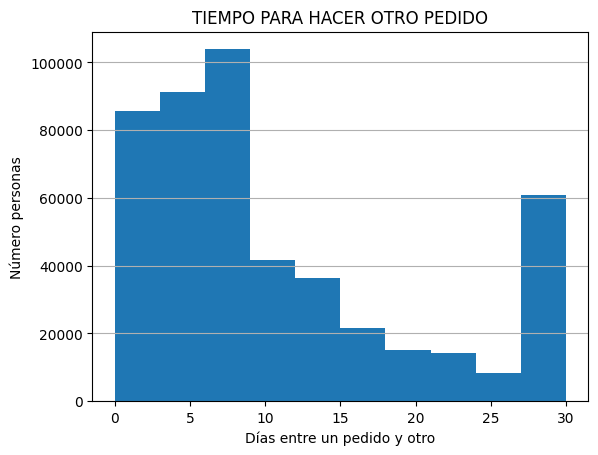

In [40]:
# Distribución de días para realizar otro pedido
orders['days_since_prior_order'].plot(
    kind='hist',
    title='TIEMPO PARA HACER OTRO PEDIDO',
    xlabel='Días entre un pedido y otro',
    ylabel='Número personas'
)

plt.grid(axis='y')
plt.show()

>**Conclusiones:**
>
>La mayoría de los usuarios suelen esperar 30 días para realizar un pedido nuevo, quiere decir que compran víveres 1 vez al mes. El segundo grupo mas grande son las personas que compran víveres cada 7 días, es decir, una vez a la semana.
>
>Los periodos de espera menos populares van de 15 a 29 días.

### **Etapa [B]**
---


1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.

2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).

3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

#### **[B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`.**

In [41]:
# Creando Series para Miércoles y Sábado, agrupando el número de pedidos a partir de la hora en que fue realizado.
wed_orders_by_hour = orders.query("order_dow == 3").groupby(by=['order_hour_of_day'])['order_id'].nunique()
sat_orders_by_hour = orders.query("order_dow == 6").groupby(by=['order_hour_of_day'])['order_id'].nunique()

In [42]:
# Uninedo ambos Series en un solo DataFrame, utilizando pd.concat()
wed_sat_orders_by_hour = pd.concat([wed_orders_by_hour, sat_orders_by_hour], axis='columns')

# Renombrando las columnas
wed_sat_orders_by_hour.columns = ['wed_orders','sat_orders']

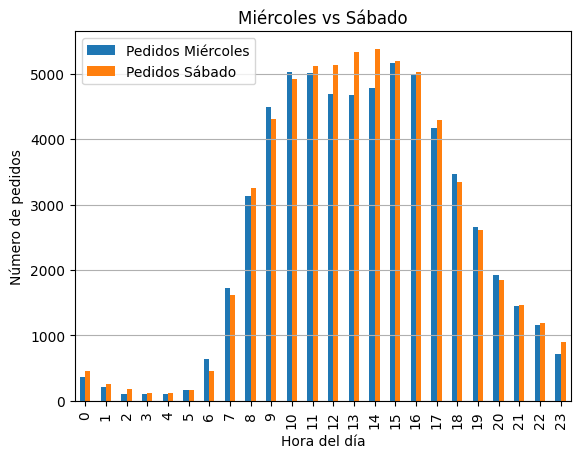

In [43]:
# Graficando con método plot()
wed_sat_orders_by_hour.plot(
    kind='bar',title='Miércoles vs Sábado', xlabel='Hora del día', ylabel='Número de pedidos'
)
plt.legend(['Pedidos Miércoles', 'Pedidos Sábado'])
plt.grid(axis='y')
plt.show()

>**Conclusiones:**
>
>Los días Miércoles y Sábado tienen un comportamiento general muy parecido, en los que las horas con mas pedidos son entre las 9 y las 17 hrs.
>
>Los miércoles se reciben mas órdenes a las 15 hrs, mientras que los sábados el horario con mayor densidad de pedido es a las 14 hrs

#### **[B2] ¿Cuál es la distribución para el número de pedidos por cliente?**

In [44]:
# Agrupar por usuario para ver cuantos pedido hizo cada uno
user_num_of_orders = orders.groupby(by='user_id', as_index=False).agg(num_of_orders=('order_id','nunique'))


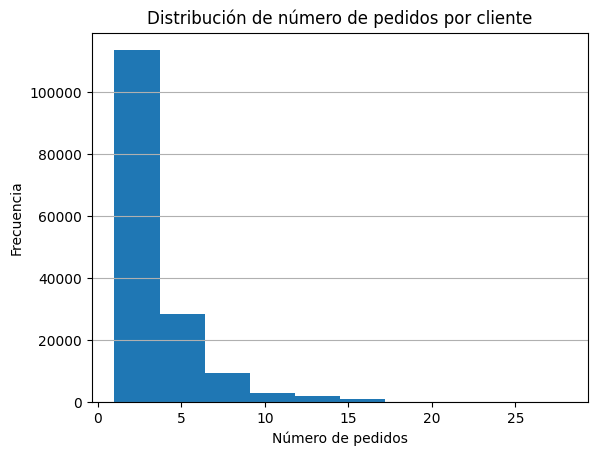

In [45]:
plt.hist(user_num_of_orders['num_of_orders'])

plt.title('Distribución de número de pedidos por cliente')
plt.xlabel('Número de pedidos')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

In [46]:
print('¿Cuál es la distribución para el número de pedidos por cliente?')
print('********************************************************************')
display(user_num_of_orders['num_of_orders'].value_counts().reset_index())

¿Cuál es la distribución para el número de pedidos por cliente?
********************************************************************


,num_of_orders,count
0,1,55357
1,2,36508
2,3,21547
3,4,13498
4,5,8777
5,6,6012
6,7,4240
7,8,3019
8,9,2152
9,10,1645


>**Conclusiones:**
>
>La gran mayoría de los clientes solo han realizado entre 1 y 4 pedidos, son muy pocos los que realizan mas pedidos. El numero maximo de pedidos que ha realizado un cliente es 28.

#### **[B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?**

In [47]:
# Encontrando cuantas veces se pidió cada producto, agrupando por product_id.
product_ids = order_products.groupby(by='product_id', as_index=False).agg(times_ordered = ('product_id','count'))
# Ordenando de forma descendente los product_id de acuerdo a las veces que fueron ordenados.
popular_products = product_ids.sort_values(by='times_ordered', ascending=False).reset_index(drop=True)


In [48]:
# Uniendo el DataFrame products que contiene los product_name en relación con los product_id presentes
popular_products = popular_products.merge(products, on='product_id',how='left')

In [49]:
# Seleccionar los primero 20 registros
top20_product_names = popular_products.head(20)

In [50]:
print('¿Cuáles son los 20 productos más populares?')
print('*************************************************************************')
display(top20_product_names)


¿Cuáles son los 20 productos más populares?
*************************************************************************


,product_id,times_ordered,product_name,aisle_id,department_id
0,24852,66050,BANANA,24,4
1,13176,53297,BAG OF ORGANIC BANANAS,24,4
2,21137,37039,ORGANIC STRAWBERRIES,24,4
3,21903,33971,ORGANIC BABY SPINACH,123,4
4,47209,29773,ORGANIC HASS AVOCADO,24,4
5,47766,24689,ORGANIC AVOCADO,24,4
6,47626,21495,LARGE LEMON,24,4
7,16797,20018,STRAWBERRIES,24,4
8,26209,19690,LIMES,24,4
9,27845,19600,ORGANIC WHOLE MILK,84,16


>**Conclusiones:**
>
>El producto mas popular en toda la tienda es **BANANA con id 24852**
>
>El top 20 de productos mas vendidos es en su mayoría del departamento 4 ("produce"), a excepción de la leche que pertenece al departamento 16 ("dairy eggs")

### **Etapa [C]**
---


1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?

2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

3. Para cada producto, ¿cuál es la tasa de repetición del pedido? (número de repeticiones de pedido / total de pedidos)

4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.

5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

#### **[C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?**

In [51]:
# Encontrar cuantos productos incluye cada orden:
products_by_order = order_products.groupby(by='order_id', as_index=False).agg(num_products=('product_id','count'))

In [52]:
# Distribución:

print('[C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?')
print('************************************************************************************************')
display(products_by_order.groupby(by='num_products', as_index=False).count())

[C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?
************************************************************************************************


,num_products,order_id
0,1,21847
1,2,26292
2,3,29046
3,4,31054
4,5,31923
...,...,...
85,98,1
86,104,1
87,108,1
88,115,1


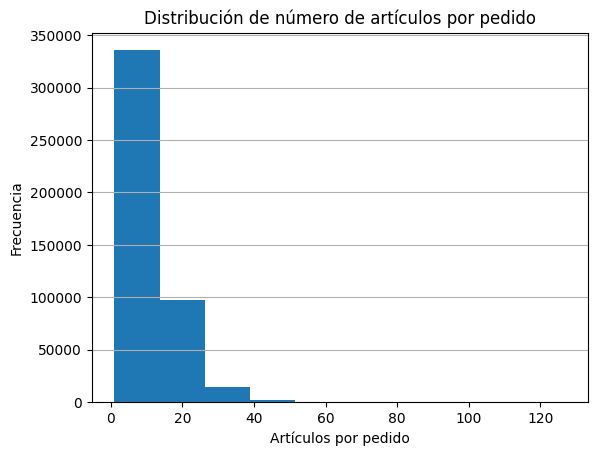

In [53]:
products_by_order['num_products'].hist()

plt.title('Distribución de número de artículos por pedido')
plt.xlabel('Artículos por pedido')
plt.ylabel('Frecuencia')
plt.grid(axis='x')
plt.show()

> **Conclusiones:**
>
>- Los pedidos de 5 productos, son los mas comúnes, seguidos de 6, 4 y 7.
>
>- Los pedidos con pocos productos dominan, las personas suelen comprar entre 1 y 11 productos.
>
>- A partir de 5 productos, la tendencía es negativa a medida que incrementan los productos en un pedido.
>
>- El pedido con la mayor cantidad de productos tuvo 127, esto solo ha ocurrido una vez.

#### **[C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?**

In [54]:
# Filtrando Data Frame para mostrar unicamente los productos que fueron reordenados.
reordered_products = order_products.query("reordered == 1")

display(reordered_products) # DataFrame artículos reordenados
print('\nVista previa de los productos mas reordenados:')
display(reordered_products['product_id'].value_counts().reset_index()) # Vista previa de los productos mas reordenados

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1
...,...,...,...,...
4544999,1622300,24852,1,1
4545000,1125324,40600,6,1
4545002,577211,15290,12,1
4545004,692640,47766,4,1



Vista previa de los productos mas reordenados:


,product_id,count
0,24852,55763
1,13176,44450
2,21137,28639
3,21903,26233
4,47209,23629
...,...,...
36223,35313,1
36224,18946,1
36225,19440,1
36226,27533,1


In [55]:
# Agrupando por product_id, para contar cuántas veces ha sido reordenado cada producto.
reordered_products_count = (
    reordered_products
    .groupby(by='product_id', as_index=False)
    .agg(times_reordered=('reordered','count')) # Conteo de productos reordenados
    .sort_values(by='times_reordered', ascending=False) # Ordenando la tabla para mostrar los productos mas reordenados primero.
    .reset_index(drop=True) # Reiniciar indice
)


In [56]:
# Unir top20_reordered_products con products:
reordered_product_names = products[['product_id', 'product_name']].merge(reordered_products_count, on='product_id', how='right')

print('[C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia?')
print('*****************************************************************************************')
display(reordered_product_names.head(20))

[C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia?
*****************************************************************************************


,product_id,product_name,times_reordered
0,24852,BANANA,55763
1,13176,BAG OF ORGANIC BANANAS,44450
2,21137,ORGANIC STRAWBERRIES,28639
3,21903,ORGANIC BABY SPINACH,26233
4,47209,ORGANIC HASS AVOCADO,23629
5,47766,ORGANIC AVOCADO,18743
6,27845,ORGANIC WHOLE MILK,16251
7,47626,LARGE LEMON,15044
8,27966,ORGANIC RASPBERRIES,14748
9,16797,STRAWBERRIES,13945


>**Conclusiones:**
>
>Los primeros 6 productos que mas fueron reordenados coinciden en orden con los primeros 6 productos mas populares que fueron identificadors previamente.

#### **[C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?**

In [57]:
# Uniendo DataFrames con la información adquirida previamente. (Veces ordenado y veces reordenado)
ordered_reordered = popular_products.merge(reordered_product_names, on=['product_id', 'product_name'], how='left')

display(ordered_reordered)

,product_id,times_ordered,product_name,aisle_id,department_id,times_reordered
0,24852,66050,BANANA,24,4,55763.0
1,13176,53297,BAG OF ORGANIC BANANAS,24,4,44450.0
2,21137,37039,ORGANIC STRAWBERRIES,24,4,28639.0
3,21903,33971,ORGANIC BABY SPINACH,123,4,26233.0
4,47209,29773,ORGANIC HASS AVOCADO,24,4,23629.0
...,...,...,...,...,...,...
45568,5400,1,COCONUT FLAVOR,17,13,NaN
45569,5398,1,ORGANIC RED PEAR,24,4,NaN
45570,44197,1,BEACH DEFENSE SUNSCREEN LOTION BROAD SPECTRUM ...,127,11,NaN
45571,49663,1,ULTRA PROTEIN POWER CRUNCH PEANUT BUTTER N' HO...,57,14,NaN


In [58]:
# Al unir, aparecieron datos ausentes y se modificó el tipo de dato de int a float
# Solucionando problemas emergentes...
ordered_reordered['times_reordered'] = ordered_reordered['times_reordered'].fillna(0).astype('int')

In [59]:
# Creando una nueva columna 'reorder_rate'.
ordered_reordered['reorder_rate'] = ordered_reordered['times_reordered'] / ordered_reordered['times_ordered']

print('[C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?')
print('*************************************************************************************************')
display(ordered_reordered)

[C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?
*************************************************************************************************


,product_id,times_ordered,product_name,aisle_id,department_id,times_reordered,reorder_rate
0,24852,66050,BANANA,24,4,55763,0.844254
1,13176,53297,BAG OF ORGANIC BANANAS,24,4,44450,0.834006
2,21137,37039,ORGANIC STRAWBERRIES,24,4,28639,0.773212
3,21903,33971,ORGANIC BABY SPINACH,123,4,26233,0.772217
4,47209,29773,ORGANIC HASS AVOCADO,24,4,23629,0.793639
...,...,...,...,...,...,...,...
45568,5400,1,COCONUT FLAVOR,17,13,0,0.000000
45569,5398,1,ORGANIC RED PEAR,24,4,0,0.000000
45570,44197,1,BEACH DEFENSE SUNSCREEN LOTION BROAD SPECTRUM ...,127,11,0,0.000000
45571,49663,1,ULTRA PROTEIN POWER CRUNCH PEANUT BUTTER N' HO...,57,14,0,0.000000


>**Conclusiones:**
>
>La columna `'reorder_rate'` indica cual es la tasa de reordenamientos por producto, es decir, la proporción de las veces que se pide y que se vuelve a pedir.
>
>Cuando un producto no ha sido reordenado, la tasa de reordenamientos será 0 (9345 productos).
>
>Está infomación puede ser muy útil para determinar si un producto merece ser resurtido en tienda y cuales a pesar de tener ventas, no es conviene.

#### **[C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?**

In [60]:
# Para esto, primero agrupar order_products por order_id
products_ordered_reordered_by_order = (
    order_products
    .groupby(by='order_id', as_index=False)
    .agg(
        products_ordered=('reordered','count'), # count() devuelve el numero de artículos pedidos por cada orden
        products_reordered=('reordered','sum') # sum() devuelve número de artículos re-ordenados por cada orden.
    )
)

In [61]:
# DataFrame para relacionar cada pedido con un usuario
    # Unión de DataFrames, se establece la conección entre order_id y user_id
users_orders_products_count = (
    orders[['user_id', 'order_id']]
    .merge(products_ordered_reordered_by_order, on='order_id', how='left')
    .fillna(0)
)


In [62]:
users_orders_products_count

,user_id,order_id,products_ordered,products_reordered
0,183418,1515936,13.0,7.0
1,163593,1690866,6.0,3.0
2,39980,1454967,6.0,0.0
3,82516,1768857,16.0,11.0
4,196724,3007858,27.0,11.0
...,...,...,...,...
478947,5617,3210681,6.0,4.0
478948,112087,3270802,9.0,2.0
478949,82944,885349,14.0,7.0
478950,4391,216274,7.0,7.0


In [63]:
# Agrupamiento por user_id y suma en las columnas para obtener el total de productos ordenados y reordenados por cada cliente
users_products_count = (
    users_orders_products_count
    .groupby(by='user_id', as_index=False)
    .agg({'products_ordered':'sum', 'products_reordered':'sum'})
)

# Tasa de reordenamiento por usuario
users_products_count['reorder_rate'] = users_products_count['products_reordered'] / users_products_count['products_ordered']
users_products_count['reorder_rate'] = users_products_count['reorder_rate'].fillna(0)

In [64]:
print('[C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?')
print('*****************************************************************************')
display(users_products_count)

[C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?
*****************************************************************************


,user_id,products_ordered,products_reordered,reorder_rate
0,2,26.0,1.0,0.038462
1,4,2.0,0.0,0.000000
2,5,12.0,8.0,0.666667
3,6,4.0,0.0,0.000000
4,7,14.0,13.0,0.928571
...,...,...,...,...
157432,206203,27.0,6.0,0.222222
157433,206206,21.0,15.0,0.714286
157434,206207,46.0,41.0,0.891304
157435,206208,125.0,87.0,0.696000


>**Conclusiones:**
>
>Cada cliente tiene un comportamiento muy diferente en cuanto a reordenar productos se refiere, gracias a la columna `'reorder_rate'` fácilmente se puede conocer este comportamiento para cada usuario. Conociendo la tasa de re-compra de cada cliente es posible crear ofertas personalizadas, diferenciar clientes ocasionales de cliente leales, etc.

#### **[C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?**

In [65]:
# Filtrando DataFrame para mostrar únicamente los productos que fueron añadidos primero en un carrito.
first_products_added = order_products[['product_id', 'add_to_cart_order']].query('add_to_cart_order == 1')
display(first_products_added)


,product_id,add_to_cart_order
1,1560,1
2,26683,1
14,37553,1
16,10017,1
23,8518,1
...,...,...
4544978,46175,1
4544989,20842,1
4544990,28576,1
4544997,10017,1


In [66]:
# Agrupando por product_id para contar cuantas veces ha sido añadido primero cada producto.
times_product_added_first_ids = first_products_added.groupby(by='product_id', as_index=False).count()
times_product_added_first_ids.columns = ['product_id', 'times_product_added_first']

In [67]:
# Vista previa de dataframe resultante
times_product_added_first_ids.sample(5)

,product_id,times_product_added_first
16220,30081,3
26111,48460,1
12218,22677,32
18823,34888,1
18149,33613,5


In [68]:
# Uniendo DataFrame "times_product_added_first_id" con "products" para conocer el nombre de cada producto
times_product_added_first = (
    products
    .merge(times_product_added_first_ids, on='product_id', how='right')
)


In [69]:
# Vista previa de dataframe resultante
times_product_added_first.sample(5)

,product_id,product_name,aisle_id,department_id,times_product_added_first
19261,35697,HANDY SIZE SPONGES,114,17,4
7942,14739,CHOCOLATE DIPPED COCONUT,3,19,14
13283,24611,PEPPERMINT HERBAL TEA,94,7,1
15325,28430,WETJET FEBREZE LAVENDER VANILLA & COMFORT SCEN...,114,17,4
5690,10482,BEYOND CHICKEN LIGHTLY SEASONED STRIPS,14,20,15


In [70]:
# Ordenando de forma descendente y extrayendo los primeros 20
top20_products_added_first = (
    times_product_added_first
    .sort_values(by='times_product_added_first', ascending=False)
    .reset_index(drop=True).loc[:19,:]
)

print('[C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?')
print('*********************************************************************************************')
display(top20_products_added_first)

[C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?
*********************************************************************************************


,product_id,product_name,aisle_id,department_id,times_product_added_first
0,24852,BANANA,24,4,15562
1,13176,BAG OF ORGANIC BANANAS,24,4,11026
2,27845,ORGANIC WHOLE MILK,84,16,4363
3,21137,ORGANIC STRAWBERRIES,24,4,3946
4,47209,ORGANIC HASS AVOCADO,24,4,3390
5,21903,ORGANIC BABY SPINACH,123,4,3336
6,47766,ORGANIC AVOCADO,24,4,3044
7,19660,SPRING WATER,115,7,2336
8,16797,STRAWBERRIES,24,4,2308
9,27966,ORGANIC RASPBERRIES,123,4,2024


>**Conclusiones:**
>
>- Siguiendo la tendencia de que las Bananas son el producto mas ordenado y reordenado, también son el primer producto que mas veces ha sido añadido al carrito en primer lugar.
>
>- Se observa que muchos de los productos que con mayor frecuencia son añadidos primero al carrito son frutas y verduras
>
>- Observando estos datos, es posible reconocer el comportamiento de los clientes y el orden en el cual prefieren realizar sus compras. Esta información es valiosa para diseñar la distribución de los productos de manera estratégicas u optimas, para mejorar las ventas y crear una experiencia para el usuario mas placentera.

## 📝**Conclusion general del proyecto:**
---


>Los conocimientos y habilidades adquiridos sobre la librería de Pandas y los objetos DataFrame y Series permiten analizar conjuntos de datos extensos, crear relaciones entre diferentes conjuntos y obtener estadísticas interesantes para mejorar, opimizar, proponer estrategías y análizar el éxito de un negocio.
>
>A partir de esto, fue posible identificar:
>
>- Los productos mas populares
>- Los días y horarios con mayor actividad 
>- Clientes leales que repiten pedidos
>- Los productos con mejor tasa de re-ordenamiento
>- La tendencia en el tamaño de los pedidos
>
>Y mas estadísticas que serán múy útiles en las tomas de decisiones y la implementación de mejoras.